# 200507

로또 데이터 긁어와 저장 후 분석 및 예측을 해보자

역대 로또 번호를 api로 받아와서 그걸 엑셀에 이쁘게 저장


https://stricky.tistory.com/115

In [1]:
from urllib.request import urlopen
import pandas as pd
import json
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
label = ['회차','추첨일','총판매금액','총1등당첨금','1등당첨게임수','게임당1등당첨금','1번번호','2번번호','3번번호','4번번호','5번번호','6번번호','보너스번호']

In [ ]:
## 로또 번호 history 크롤링
#02127~200507
#909회까지 있음
print(label)
history_list = []
for i in range(1, 910): 
    url="http://www.nlotto.co.kr/common.do?method=getLottoNumber&drwNo="+str(i)

    result_data = urlopen(url)
    result = result_data.read() 
    lotto = json.loads(result)
    

    # list로 만들기
    lotto_num = [lotto["drwNo"], lotto["drwNoDate"], lotto["totSellamnt"], lotto["firstAccumamnt"], lotto["firstPrzwnerCo"], lotto["firstWinamnt"], \
                 lotto["drwtNo1"], lotto["drwtNo2"], lotto["drwtNo3"], lotto["drwtNo4"], lotto["drwtNo5"], lotto["drwtNo6"], lotto["bnusNo"]]
    history_list.append(lotto_num)
# pandas로 변환
db = pd.DataFrame(history_list, columns =label)
# csv 파일로 저장
db.to_csv("lotto_number_history.csv", header=True, encoding='utf-8-sig')
beep = lambda x: os.system("echo -n '\a';sleep 0.3;" * x);beep(3);

# 저장한 DB 불러오기

In [2]:
df=pd.read_csv("lotto_number_history.csv")
df.head(30)

,Unnamed: 0,회차,추첨일,총판매금액,총1등당첨금,1등당첨게임수,게임당1등당첨금,1번번호,2번번호,3번번호,4번번호,5번번호,6번번호,보너스번호
0,0,1,2002-12-07,3681782000,863604600,0,0,10,23,29,33,37,40,16
1,1,2,2002-12-14,4904274000,0,1,2002006800,9,13,21,25,32,42,2
2,2,3,2002-12-21,4729342000,0,1,2000000000,11,16,19,21,27,31,30
3,3,4,2002-12-28,5271464000,1267147200,0,0,14,27,30,31,40,42,2
4,4,5,2003-01-04,6277102000,3041094900,0,0,16,24,29,40,41,42,3
5,5,6,2003-01-11,15305356000,0,1,6574451700,14,15,26,27,40,42,34
6,6,7,2003-01-18,12794890000,2600913000,0,0,2,9,16,25,26,40,42
7,7,8,2003-01-25,20751450000,7336896000,0,0,8,19,25,34,37,39,9
8,8,9,2003-02-01,73624020000,25803852000,0,0,2,4,16,17,36,39,14
9,9,10,2003-02-08,260856392000,0,13,6430437900,9,25,30,33,41,44,6


In [3]:
pd.options.display.float_format = '{:,.12}'.format  # 깔끔하게 나오게 하기 위해
df.describe()

,Unnamed: 0,회차,총판매금액,총1등당첨금,1등당첨게임수,게임당1등당첨금,1번번호,2번번호,3번번호,4번번호,5번번호,6번번호,보너스번호
count,909.0,909.0,909.0,909.0,909.0,909.0,909.0,909.0,909.0,909.0,909.0,909.0,909.0
mean,454.0,455.0,"59,196,617,505.0","10,167,128,578.2",6.90539053905,"2,745,431,006.65",6.6798679868,13.1144114411,19.9680968097,26.2508250825,32.8558855886,39.499449945,22.3410341034
std,262.549995239,262.549995239,"15,911,356,768.5","7,435,593,755.99",3.70168784969,"2,640,731,816.11",5.29980483226,6.90049647149,7.50961753453,7.64311413638,6.88963668314,5.32213912777,13.2286016817
min,0.0,1.0,"3,681,782,000.0",0.0,0.0,0.0,1.0,2.0,3.0,5.0,9.0,19.0,1.0
25%,227.0,228.0,"47,345,476,000.0",0.0,4.0,"1,524,130,543.0",3.0,8.0,14.0,21.0,28.0,37.0,11.0
50%,454.0,455.0,"57,134,544,000.0","12,548,090,250.0",7.0,"2,028,610,500.0",5.0,12.0,19.0,27.0,34.0,41.0,22.0
75%,681.0,682.0,"68,597,839,000.0","15,605,822,253.0",9.0,"3,137,224,600.0",10.0,18.0,26.0,32.0,38.0,44.0,34.0
max,908.0,909.0,2.60856392e+11,"43,624,374,375.0",30.0,"40,722,959,400.0",35.0,37.0,40.0,43.0,44.0,45.0,45.0


In [4]:
# 1~6번 번호만 가져오자
df_only_number=pd.DataFrame([df['1번번호'], df['2번번호'], df['3번번호'], df['4번번호'], df['5번번호'], df['6번번호']]).T
pd.options.display.float_format = '{:,.5}'.format  # 깔끔하게 나오게 하기 위해
for i in range(1, 7):
    print('%d 번 번호 평균 : %d' % (i, int(df_only_number.mean()[i-1])))
df_only_number.describe()

1 번 번호 평균 : 6
2 번 번호 평균 : 13
3 번 번호 평균 : 19
4 번 번호 평균 : 26
5 번 번호 평균 : 32
6 번 번호 평균 : 39


,1번번호,2번번호,3번번호,4번번호,5번번호,6번번호
count,909.0,909.0,909.0,909.0,909.0,909.0
mean,6.6799,13.114,19.968,26.251,32.856,39.499
std,5.2998,6.9005,7.5096,7.6431,6.8896,5.3221
min,1.0,2.0,3.0,5.0,9.0,19.0
25%,3.0,8.0,14.0,21.0,28.0,37.0
50%,5.0,12.0,19.0,27.0,34.0,41.0
75%,10.0,18.0,26.0,32.0,38.0,44.0
max,35.0,37.0,40.0,43.0,44.0,45.0


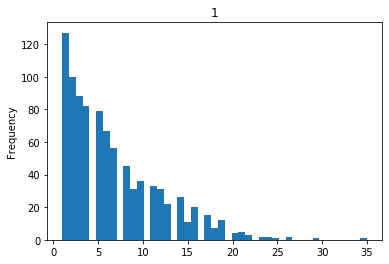

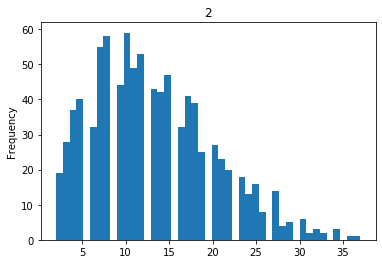

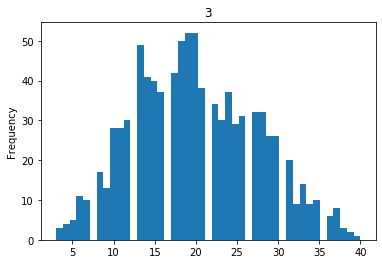

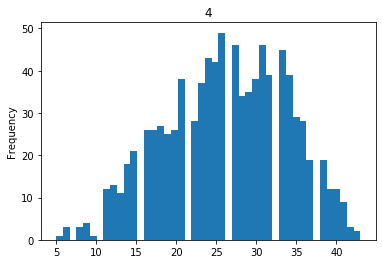

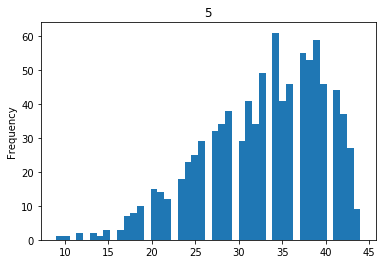

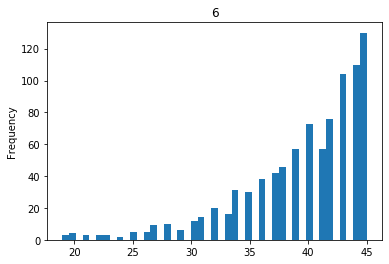

In [5]:
df_only_number['1번번호'].plot.hist(bins=45)
plt.title('1')
plt.show()

df_only_number['2번번호'].plot.hist(bins=45)
plt.title('2')
plt.show()

df_only_number['3번번호'].plot.hist(bins=45)
plt.title('3')
plt.show()

df_only_number['4번번호'].plot.hist(bins=45)
plt.title('4')
plt.show()

df_only_number['5번번호'].plot.hist(bins=45)
plt.title('5')
plt.show()

df_only_number['6번번호'].plot.hist(bins=45)
plt.title('6')
plt.show()

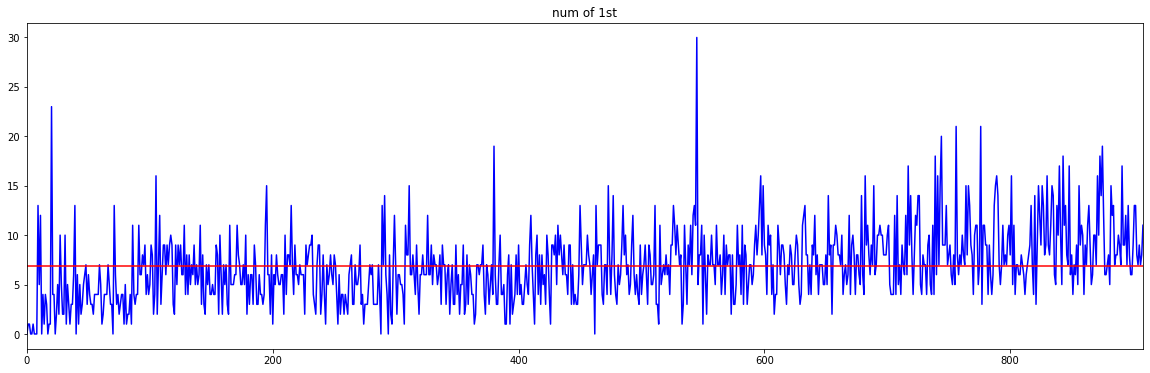

In [16]:
df['1등당첨게임수'].plot(figsize=(20,6),color = 'blue')
plt.plot(list(range((len(df['1등당첨게임수'])+2))), [df['1등당첨게임수'].mean()]*(len(df['1등당첨게임수'])+2), 'red')
plt.title('num of 1st')
plt.show()

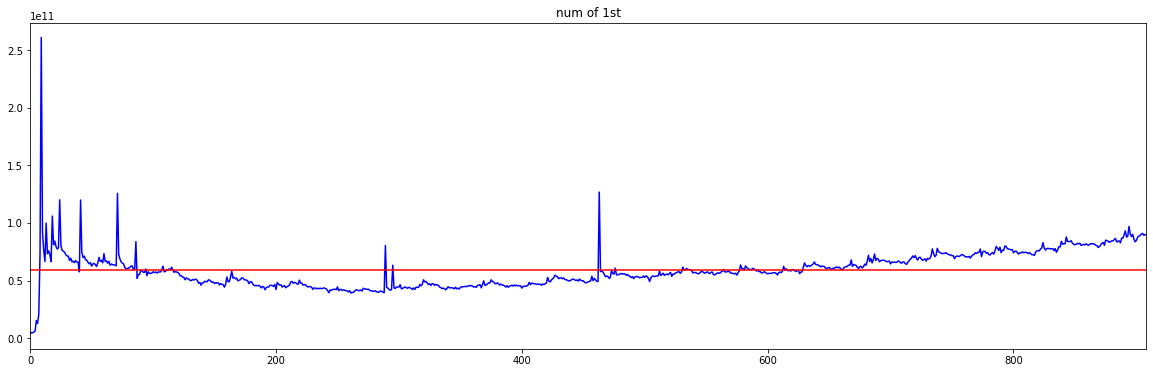

In [18]:
df['총판매금액'].plot(figsize=(20,6),color = 'b')
plt.plot(list(range((len(df['총판매금액'])+2))), [df['총판매금액'].mean()]*(len(df['총판매금액'])+2), 'red')
plt.title('num of 1st')
plt.show()

121.2

평균 갯수 : 121


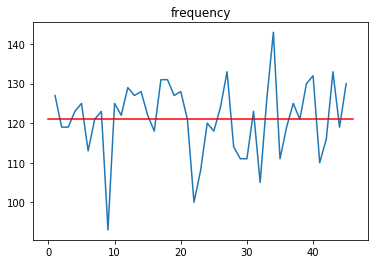

In [22]:
numm_tmp = pd.concat([df_only_number['1번번호'], df_only_number['2번번호'], df_only_number['3번번호'], df_only_number['4번번호'], df_only_number['5번번호'], df_only_number['6번번호']])
numm_tmp1 = numm_tmp.value_counts().sort_index()
print('평균 갯수 : %.0f' % (numm_tmp1.mean()))
plt.plot(numm_tmp1)
plt.plot(list(range((len(numm_tmp1)+2))), [121]*(len(numm_tmp1)+2), 'red')
plt.title('frequency')
plt.show()

In [10]:
print('적게 나온 숫자들 : %s\n\n%s' % (list(numm_tmp1.sort_values()[:6].keys().sort_values()), numm_tmp1.sort_values()[:6]))

적게 나온 숫자들 : [9, 22, 23, 29, 32, 41]

9      93
22    100
32    105
23    108
41    110
29    111
dtype: int64


In [11]:
print('많이 나온 숫자들 : %s\n\n%s' % (list(numm_tmp1.sort_values()[39:].keys().sort_values()), numm_tmp1.sort_values()[:6]))

많이 나온 숫자들 : [17, 18, 27, 34, 40, 43]

9      93
22    100
32    105
23    108
41    110
29    111
dtype: int64
